In [1]:
import scanpy as sc
import pertpy as pt
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read_h5ad("/home/icb/raphael.kfuri-rubens/data/yumm_analysis/anndata_files/immunity_dc_revision_annotation_v6.h5ad")

# Top 100 genes immune vs non-immune

In [3]:
adata.obs["annotation_v6"].value_counts(dropna=False)

annotation_v6
Non-immune cells               11771
Inflam-TAMs                     3374
Reg-TAMs                        2744
Mono-DCs                        2508
Classical Monocytes             2284
M2-like TAMs                    2058
Tissue-resident TAMs            1674
CCR7+ DCs                        946
cDC2s                            862
Neutrophils                      827
Eosinophils                      771
NK cells                         670
Conventional CD4+ T cells        540
Prolif-TAMs                      532
B cells                          486
Tregs                            316
Osteoclast-like giant cells      246
CD8+ T Cells                     220
ISG15+ Monocytes                 214
cDC1s                            171
gamma/delta T cells              151
pDCs                             115
iNKT cells                        98
Basophils/Mast cells              48
Plasma cells                      47
Name: count, dtype: int64

In [4]:
adata.obs["binary_annotation"] = adata.obs["annotation_v6"].apply(lambda x: "nonimmune" if x in ["Non-immune cells", "Osteoclast-like giant cells"] else "immune")
adata.obs["binary_annotation"].value_counts(dropna=False)

binary_annotation
immune       21656
nonimmune    12017
Name: count, dtype: int64

In [5]:
sc.tl.rank_genes_groups(adata, groupby="binary_annotation", method="wilcoxon")
gene_groups = sc.get.rank_genes_groups_df(adata, group = None)
gene_groups_subset = gene_groups.groupby("group").head(100)
gene_groups_subset.to_csv('./top_100_degs_immune_vs_non_immune.csv')

/tmp/ipykernel_877441/1498894860.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)


In [ ]:
# get counts of each cell type in each sammple in a dataframe
counts_raw = adata.obs.groupby(["annotation_v6", "genotype"]).size().unstack(fill_value=0)
counts_props = counts_raw.div(counts_raw.sum(axis=0), axis=1)*100  # Convert to percentage
counts_raw.to_csv("cell_counts_per_genotype_raw.csv")
counts_props.to_csv("cell_counts_per_genotype_props.csv")

/tmp/ipykernel_877441/1770854391.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_raw = adata.obs.groupby(["annotation_v6", "genotype"]).size().unstack(fill_value=0)


In [14]:
adata.obs["sample_id_genotype"] = adata.obs["sample_id"].astype(str) + "_" + adata.obs["genotype"].astype(str)
coda_raw = adata.obs.groupby(["annotation_v6", "sample_id_genotype"]).size().unstack(fill_value=0)
coda_props = coda_raw.div(coda_raw.sum(axis=0), axis=1)*100  # Convert to percentage
coda_raw.to_csv("cell_counts_per_sample_id_raw.csv")
coda_props.to_csv("cell_counts_per_sample_id_props.csv")

/tmp/ipykernel_877441/1532675018.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coda_raw = adata.obs.groupby(["annotation_v6", "sample_id_genotype"]).size().unstack(fill_value=0)


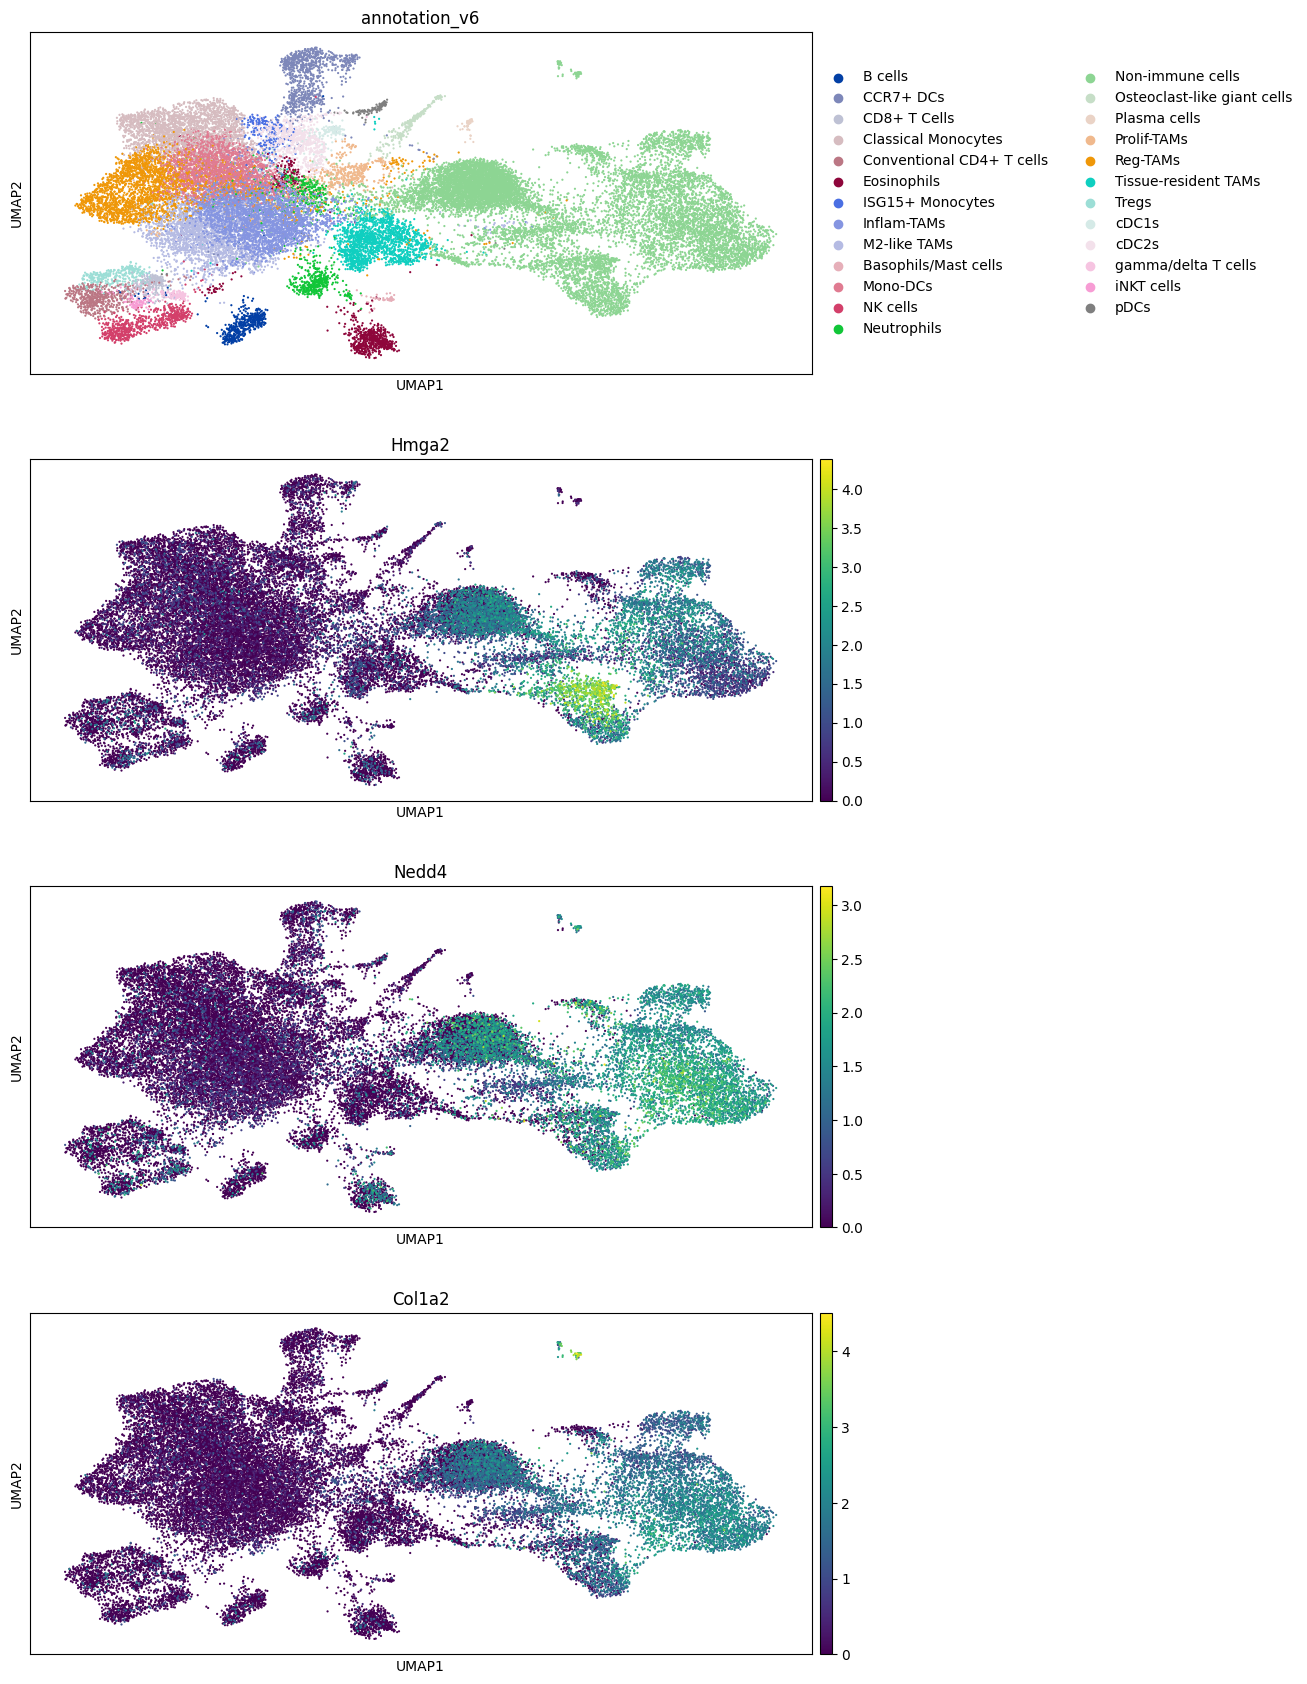

In [ ]:

sc.pl.umap(adata, color=["annotation_v6", "Hmga2", "Nedd4", "Col1a2"], wspace=0.7, size=10, ncols=1)

In [ ]:
# get mapping of cell type names to colors as dict from adata

colors_dict = dict(zip(adata.uns["annotation_v6_colors"], adata.uns["annotation_v6_categories"]))

In [20]:
dict(zip(adata.obs["annotation_v6"].cat.categories, adata.uns["annotation_v6_colors"]))

{'B cells': '#023fa5',
 'CCR7+ DCs': '#7d87b9',
 'CD8+ T Cells': '#bec1d4',
 'Classical Monocytes': '#d6bcc0',
 'Conventional CD4+ T cells': '#bb7784',
 'Eosinophils': '#8e063b',
 'ISG15+ Monocytes': '#4a6fe3',
 'Inflam-TAMs': '#8595e1',
 'M2-like TAMs': '#b5bbe3',
 'Basophils/Mast cells': '#e6afb9',
 'Mono-DCs': '#e07b91',
 'NK cells': '#d33f6a',
 'Neutrophils': '#11c638',
 'Non-immune cells': '#8dd593',
 'Osteoclast-like giant cells': '#c6dec7',
 'Plasma cells': '#ead3c6',
 'Prolif-TAMs': '#f0b98d',
 'Reg-TAMs': '#ef9708',
 'Tissue-resident TAMs': '#0fcfc0',
 'Tregs': '#9cded6',
 'cDC1s': '#d5eae7',
 'cDC2s': '#f3e1eb',
 'gamma/delta T cells': '#f6c4e1',
 'iNKT cells': '#f79cd4',
 'pDCs': '#7f7f7f'}

In [ ]:
adata.uns["annotation_v6_colors"]

array(['#023fa5', '#7d87b9', '#bec1d4', '#d6bcc0', '#bb7784', '#8e063b',
       '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9', '#e07b91', '#d33f6a',
       '#11c638', '#8dd593', '#c6dec7', '#ead3c6', '#f0b98d', '#ef9708',
       '#0fcfc0', '#9cded6', '#d5eae7', '#f3e1eb', '#f6c4e1', '#f79cd4',
       '#7f7f7f'], dtype=object)

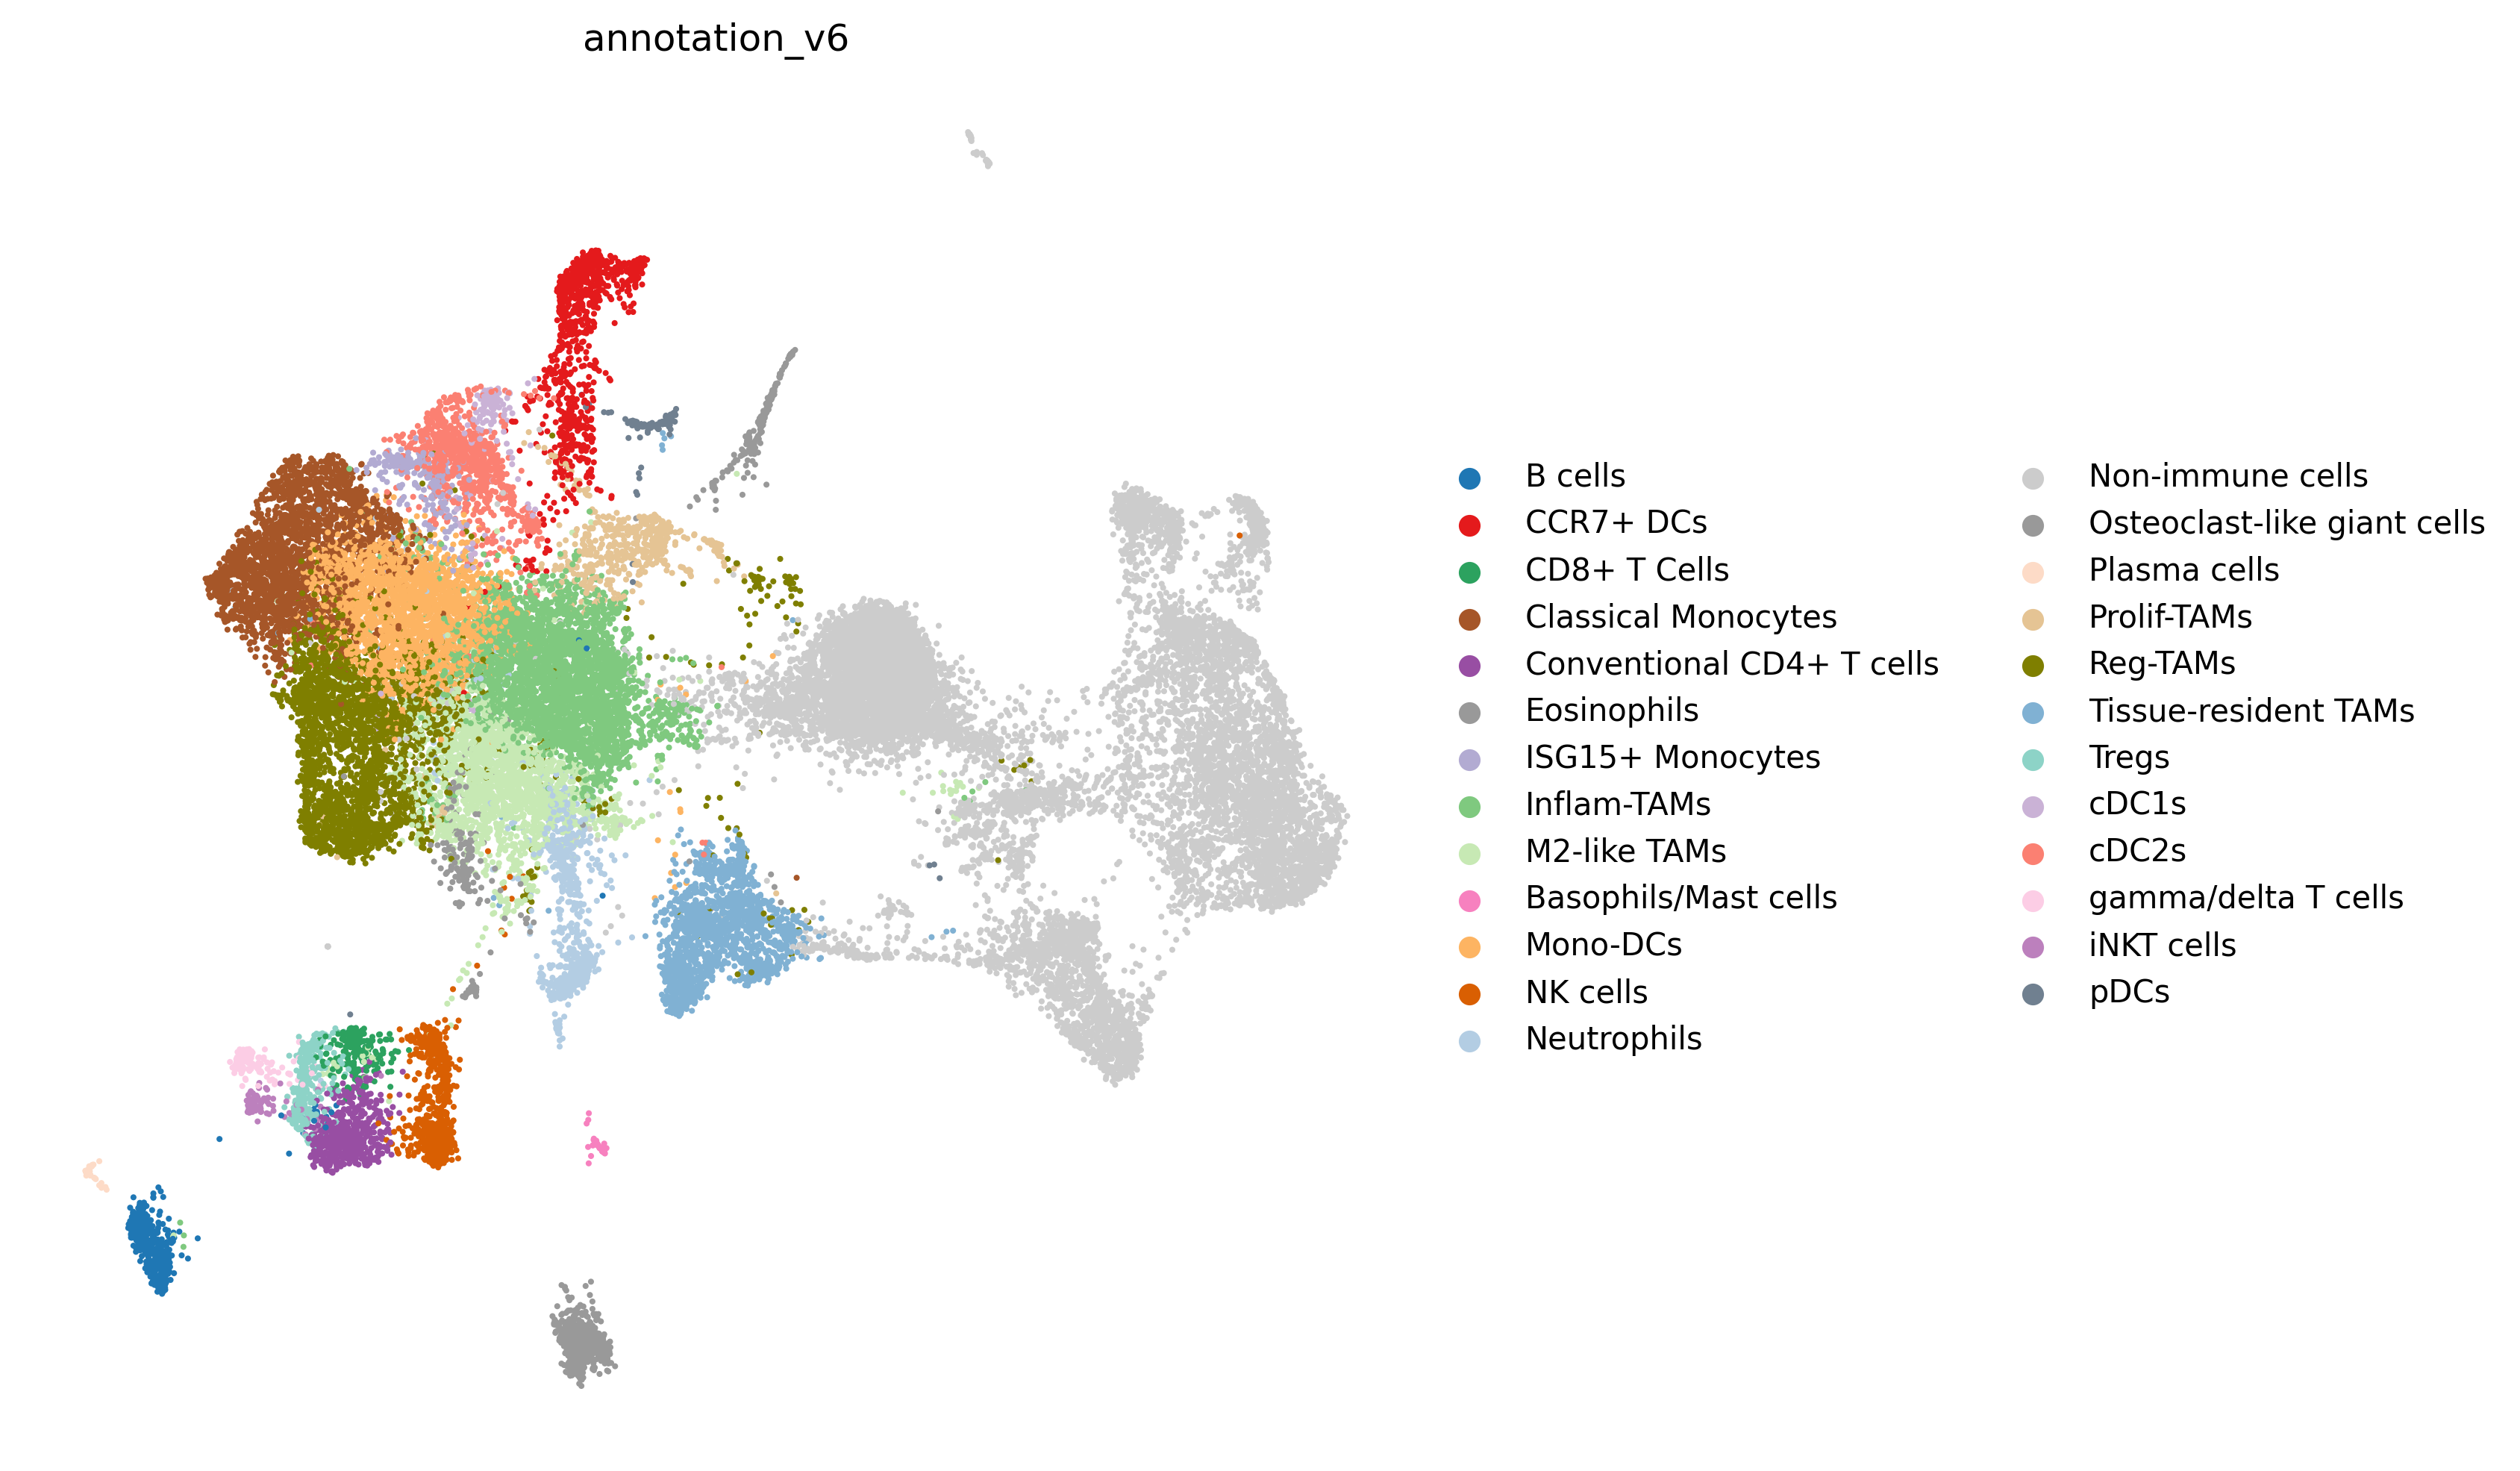

In [33]:
adata.uns["annotation_v6_colors"] = [
    "#1f77b4",  # B cells – classic blue
    "#e41a1c",  # CCR7+ DCs – bright red
    "#2ca25f",  # CD8+ T Cells – green-teal (was blue)
    "#a65628",  # Classical Monocytes – muted brown
    "#984ea3",  # Conventional CD4+ T cells – purple
    "#999999",  # Eosinophils – grey
    "#b2abd2",  # ISG15+ Monocytes – pale purple
    "#7fc97f",  # Inflam-TAMs – soft green
    "#c7e9b4",  # M2-like TAMs – light green
    "#f781bf",  # Basophils/Mast cells – soft pink
    "#fdb462",  # Mono-DCs – light orange
    "#d95f02",  # NK cells – dark orange
    "#b3cde3",  # Neutrophils – light blue-grey
    "#cccccc",  # Non-immune cells – medium grey
    "#999999",  # Osteoclast-like giant cells – dark grey
    "#fddbc7",  # Plasma cells – peach
    "#e5c494",  # Prolif-TAMs – tan
    "#7f7f00",  # Reg-TAMs – olive green (was brown)
    "#80b1d3",  # Tissue-resident TAMs – steel blue
    "#8dd3c7",  # Tregs – aqua
    "#cab2d6",  # cDC1s – lavender
    "#fb8072",  # cDC2s – salmon
    "#fccde5",  # gamma/delta T cells – light pink
    "#bc80bd",  # iNKT cells – violet
    "#708090",  # pDCs – slate gray
]

sc.tl.umap(adata, min_dist=0.3, spread=1.2)

with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": (300)}):
    sc.pl.umap(adata, color="annotation_v6", palette=adata.uns["annotation_v6_colors"], size=15, frameon=False, save="_immunity_dc_revision_annotation_v6.png")

# scCODA

In [23]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="annotation_v6",
    sample_identifier="sample_id",
    covariate_obs=["genotype"],
)
print(sccoda_data)
print(sccoda_data["coda"].X)
print(sccoda_data["coda"].obs)

MuData object with n_obs × n_vars = 33681 × 23701
  var:	'n_cells'
  2 modalities
    rna:	33673 x 23676
      obs:	'library_id', 'sample_id', 'genotype', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_counts', 'log1p_n_counts', 'log1p_n_genes', 'percent_hb', 'n_counts_hb', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_top50', 'cell_passed_qc', 'consensus_fraction', 'qc_cluster', 'cluster_passed_qc', 'consensus_passed_qc', 'cell_passed_qc_int', 'cluster_passed_qc_int', 'consensus_passed_qc_int', 'leiden_res_0.05', 'leiden_res_0.10', 'leiden_res_0.50', 'leiden_res_1.00', 'leiden_res_2.00', 'annotation_v1_subannot', 'annotation_DC_fine', 'myeloid_fine', 'DC_fine', 'annotation_T_NK_fine', 'annotation_v2', 'annotation_MacMono_fine', 'annotation_v3', 'annotation_v4', 'annotation_b_sep', 'annotation_v5', 'annotation_v6', 'scCODA_sample_id'
      var:	'ensembl_ids', 'gene_symbols', 'n_cells', 'hb', 'mito', 'ribo', 'n_counts', 'highly_variable', 'means', 'disp

/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/pertpy-env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/pertpy-env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/pertpy-env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/pertpy-env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may w

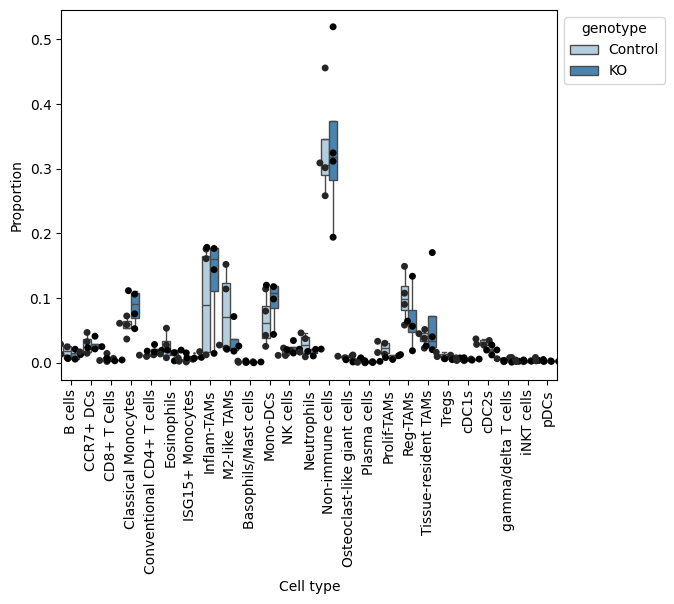

In [24]:
sccoda_model.plot_boxplots(sccoda_data, modality_key="coda", feature_name="genotype", add_dots=True)
plt.show()

In [29]:
sccoda_data["coda"].X.shape

(8, 25)

In [38]:
sccoda_df = pd.DataFrame(sccoda_data["coda"].X, columns=sccoda_data["coda"].var.index, index=sccoda_data["coda"].obs.index).T
#sccoda_df["genotype"] = sccoda_data["coda"].obs["genotype"]
sccoda_df

scCODA_sample_id,S10,S13,S2,S4,S5,S7,S8,S9
annotation_v6,,,,,,,,
B cells,21.0,23.0,90.0,115.0,53.0,48.0,60.0,76.0
CCR7+ DCs,80.0,166.0,54.0,67.0,223.0,171.0,100.0,85.0
CD8+ T Cells,10.0,17.0,13.0,8.0,99.0,25.0,32.0,16.0
Classical Monocytes,340.0,451.0,223.0,234.0,251.0,264.0,246.0,275.0
Conventional CD4+ T cells,54.0,73.0,43.0,56.0,67.0,45.0,132.0,70.0
Eosinophils,63.0,12.0,50.0,31.0,366.0,101.0,91.0,57.0
ISG15+ Monocytes,49.0,34.0,5.0,28.0,17.0,20.0,36.0,25.0
Inflam-TAMs,572.0,59.0,642.0,640.0,84.0,63.0,672.0,642.0
M2-like TAMs,83.0,289.0,100.0,90.0,781.0,555.0,84.0,76.0


In [43]:
sccoda_df_props = sccoda_df.div(sccoda_df.sum(axis=0), axis=1)*100
sccoda_df_props

scCODA_sample_id,S10,S13,S2,S4,S5,S7,S8,S9
annotation_v6,,,,,,,,
B cells,0.655226,0.568744,2.463054,2.892354,0.774401,1.315789,1.285072,2.091935
CCR7+ DCs,2.496100,4.104847,1.477833,1.685111,3.258328,4.687500,2.141786,2.339664
CD8+ T Cells,0.312012,0.420376,0.355774,0.201207,1.446523,0.685307,0.685372,0.440407
Classical Monocytes,10.608424,11.152324,6.102901,5.885312,3.667446,7.236842,5.268794,7.569502
Conventional CD4+ T cells,1.684867,1.805143,1.176793,1.408451,0.978960,1.233553,2.827158,1.926782
Eosinophils,1.965679,0.296736,1.368363,0.779678,5.347750,2.768640,1.949025,1.568951
ISG15+ Monocytes,1.528861,0.840752,0.136836,0.704225,0.248393,0.548246,0.771043,0.688137
Inflam-TAMs,17.847114,1.458952,17.569787,16.096579,1.227352,1.726974,14.392804,17.671346
M2-like TAMs,2.589704,7.146390,2.736727,2.263581,11.411455,15.213816,1.799100,2.091935


# send raw data as excel file

In [20]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="genotype",
    reference_cell_type="automatic",
)
sccoda_data["coda"]

• Automatic reference selection! Reference cell type set to iNKT cells
• Zero counts encountered in data! Added a pseudocount of 0.5.


AnnData object with n_obs × n_vars = 8 × 25
    obs: 'genotype', 'sample_id'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'

In [21]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")
sccoda_data["coda"]

sample: 100%|██████████| 11000/11000 [00:56<00:00, 195.72it/s, 127 steps of size 3.84e-02. acc. prob=0.85]


AnnData object with n_obs × n_vars = 8 × 25
    obs: 'genotype', 'sample_id'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_genotype[T.KO]'

In [22]:
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 8 samples, 25 cell types                                    │
│ Reference cell type                         │ iNKT cells                                                        │
│ Formula                                     │ genotype                                                          │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                              Final Parameter  Expected Sample                                                   │
│ Cell Type                                                                                                       │
│ B cells                           0.330            77.896                                                       │
│ CCR7+ DCs                         0.845           130.370                                                       │
│ CD8+ T Cells                     -0.308            41.156                                                       │
│ Classical Monocytes               1.674           298.682                                                       │
│ Conventional CD4+ T cells         0.431            86.175                                                       │
│ Eosinophils                       0.459            88.622                                                       │
│ ISG15+ Monocytes                 -0.250            43.614                                                       │
│ Inflam-TAMs                       1.644           289.855                                                       │
│ M2-like TAMs                      1.309           207.344                                                       │
│ Basophils/Mast cells             -1.010            20.397                                                       │
│ Mono-DCs                          1.701           306.856                                                       │
│ NK cells                          0.560            98.040                                                       │
│ Neutrophils                       0.644           106.632                                                       │
│ Non-immune cells                  3.212          1390.446                                                       │
│ Osteoclast-like giant cells      -0.139            48.734                                                       │
│ Plasma cells                     -1.019            20.214                                                       │
│ Prolif-TAMs                       0.392            82.879                                                       │
│ Reg-TAMs                          1.840           352.616                                                       │
│ Tissue-resident TAMs              1.230           191.594                                                       │
│ Tregs                             0.017            56.962                                                       │
│ cDC1s                            -0.282            42.241                                                       │
│ cDC2s                             0.833           128.815                                                       │
│ gamma/delta T cells              -0.486            34.446                                                       │
│ iNKT cells                       -0.568            31.734                                                       │
│ pDCs                             -0.531            32.930                                                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                           Final Parameter  Expected Sample  log2-fold change                    │
│ Covariate    Cell Type                                                                                          │
│ genotypeT.KO B cells                          0.000             77.896           0.000                          │
│              CCR7+ DCs                        0.000            130.370           0.000                          │
│              CD8+ T Cells                     0.000             41.156           0.000                          │
│              Classical Monocytes              0.000            298.682           0.000                          │
│              Conventional CD4+ T cells        0.000             86.175           0.000                          │
│              Eosinophils                      0.000             88.622           0.000                          │
│              ISG15+ Monocytes                 0.000             43.614           0.000                          │
│              Inflam-TAMs                      0.000            289.855           0.000                          │
│              M2-like TAMs                     0.000            207.344           0.000                          │
│              Basophils/Mast cells             0.000             20.397           0.000                          │
│              Mono-DCs                         0.000            306.856           0.000                          │
│              NK cells                         0.000             98.040           0.000                          │
│              Neutrophils                      0.000            106.632           0.000                          │
│              Non-immune cells                 0.000           1390.446           0.000                          │
│              Osteoclast-like giant cells      0.000             48.734           0.000                          │
│              Plasma cells                     0.000             20.214           0.000                          │
│              Prolif-TAMs                      0.000             82.879           0.000                          │
│              Reg-TAMs                         0.000            352.616           0.000                          │
│              Tissue-resident TAMs             0.000            191.594           0.000                          │
│              Tregs                            0.000             56.962           0.000                          │
│              cDC1s                            0.000             42.241           0.000                          │
│              cDC2s                            0.000            128.815           0.000                          │
│              gamma/delta T cells              0.000             34.446           0.000                          │
│              iNKT cells                       0.000             31.734           0.000                          │
│              pDCs                             0.000             32.930           0.000                          │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [ ]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")


Covariate       Cell Type                  
genotype[T.KO]  B cells                        False
                CCR7+ DCs                      False
                CD8+ T Cells                   False
                Classical Monocytes            False
                Conventional CD4+ T cells      False
                Eosinophils                    False
                ISG15+ Monocytes               False
                Inflam-TAMs                    False
                M2-like TAMs                   False
                Basophils/Mast cells           False
                Mono-DCs                       False
                NK cells                       False
                Neutrophils                    False
                Non-immune cells               False
                Osteoclast-like giant cells    False
                Plasma cells                   False
                Prolif-TAMs                    False
                Reg-TAMs                       False
  

In [25]:
sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=0.4)
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 8 samples, 25 cell types                                    │
│ Reference cell type                         │ iNKT cells                                                        │
│ Formula                                     │ genotype                                                          │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                              Final Parameter  Expected Sample                                                   │
│ Cell Type                                                                                                       │
│ B cells                           0.330            77.896                                                       │
│ CCR7+ DCs                         0.845           130.370                                                       │
│ CD8+ T Cells                     -0.308            41.156                                                       │
│ Classical Monocytes               1.674           298.682                                                       │
│ Conventional CD4+ T cells         0.431            86.175                                                       │
│ Eosinophils                       0.459            88.622                                                       │
│ ISG15+ Monocytes                 -0.250            43.614                                                       │
│ Inflam-TAMs                       1.644           289.855                                                       │
│ M2-like TAMs                      1.309           207.344                                                       │
│ Basophils/Mast cells             -1.010            20.397                                                       │
│ Mono-DCs                          1.701           306.856                                                       │
│ NK cells                          0.560            98.040                                                       │
│ Neutrophils                       0.644           106.632                                                       │
│ Non-immune cells                  3.212          1390.446                                                       │
│ Osteoclast-like giant cells      -0.139            48.734                                                       │
│ Plasma cells                     -1.019            20.214                                                       │
│ Prolif-TAMs                       0.392            82.879                                                       │
│ Reg-TAMs                          1.840           352.616                                                       │
│ Tissue-resident TAMs              1.230           191.594                                                       │
│ Tregs                             0.017            56.962                                                       │
│ cDC1s                            -0.282            42.241                                                       │
│ cDC2s                             0.833           128.815                                                       │
│ gamma/delta T cells              -0.486            34.446                                                       │
│ iNKT cells                       -0.568            31.734                                                       │
│ pDCs                             -0.531            32.930                                                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                           Final Parameter  Expected Sample  log2-fold change                    │
│ Covariate    Cell Type                                                                                          │
│ genotypeT.KO B cells                           0.000            78.359            0.009                         │
│              CCR7+ DCs                         0.000           131.145            0.009                         │
│              CD8+ T Cells                      0.000            41.401            0.009                         │
│              Classical Monocytes               0.000           300.457            0.009                         │
│              Conventional CD4+ T cells         0.000            86.687            0.009                         │
│              Eosinophils                       0.000            89.149            0.009                         │
│              ISG15+ Monocytes                  0.000            43.873            0.009                         │
│              Inflam-TAMs                       0.224           364.841            0.332                         │
│              M2-like TAMs                     -0.184           173.497           -0.257                         │
│              Basophils/Mast cells              0.000            20.518            0.009                         │
│              Mono-DCs                          0.000           308.680            0.009                         │
│              NK cells                          0.000            98.623            0.009                         │
│              Neutrophils                       0.000           107.265            0.009                         │
│              Non-immune cells                  0.000          1398.711            0.009                         │
│              Osteoclast-like giant cells       0.000            49.024            0.009                         │
│              Plasma cells                      0.000            20.334            0.009                         │
│              Prolif-TAMs                       0.000            83.371            0.009                         │
│              Reg-TAMs                         -0.196           291.508           -0.275                         │
│              Tissue-resident TAMs              0.000           192.733            0.009                         │
│              Tregs                             0.000            57.300            0.009                         │
│              cDC1s                             0.000            42.492            0.009                         │
│              cDC2s                             0.000           129.581            0.009                         │
│              gamma/delta T cells               0.000            34.650            0.009                         │
│              iNKT cells                        0.000            31.922            0.009                         │
│              pDCs                              0.000            33.126            0.009                         │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [26]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate       Cell Type                  
genotype[T.KO]  B cells                        False
                CCR7+ DCs                      False
                CD8+ T Cells                   False
                Classical Monocytes            False
                Conventional CD4+ T cells      False
                Eosinophils                    False
                ISG15+ Monocytes               False
                Inflam-TAMs                     True
                M2-like TAMs                    True
                Basophils/Mast cells           False
                Mono-DCs                       False
                NK cells                       False
                Neutrophils                    False
                Non-immune cells               False
                Osteoclast-like giant cells    False
                Plasma cells                   False
                Prolif-TAMs                    False
                Reg-TAMs                        True
  

In [34]:
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
import pertpy as pt
sccoda = pt.tl.Sccoda()

/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/pertpy/tools/_coda/_base_coda.py:1708: UserWarning: FixedFormatter should only be used together w

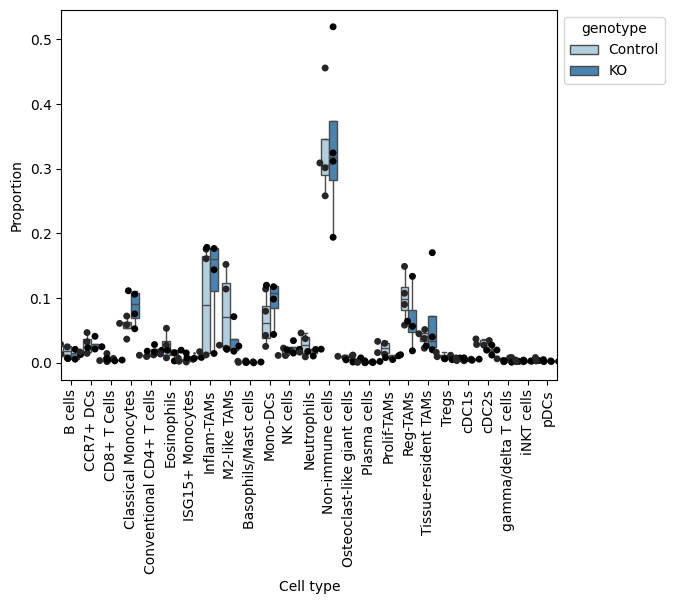

In [35]:
sccoda.plot_boxplots(sccoda_data, modality_key="coda", feature_name="genotype", add_dots=True)
plt.show()

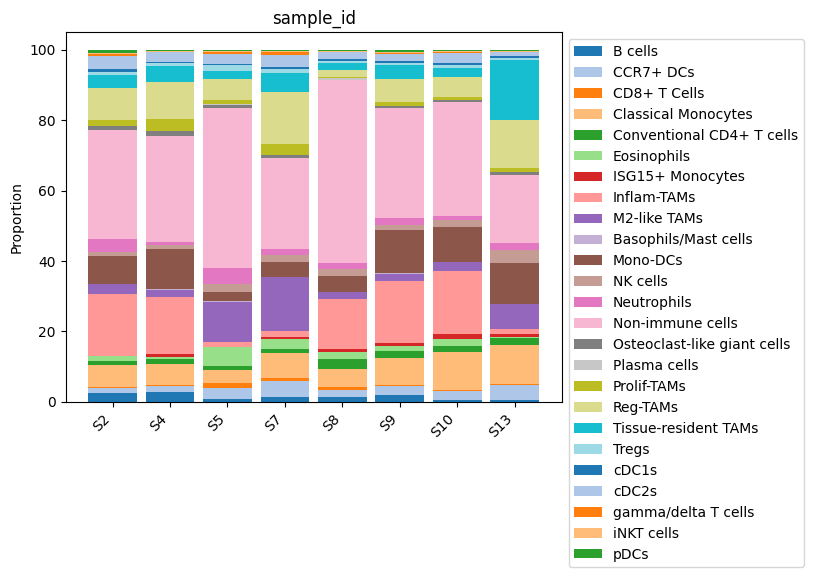

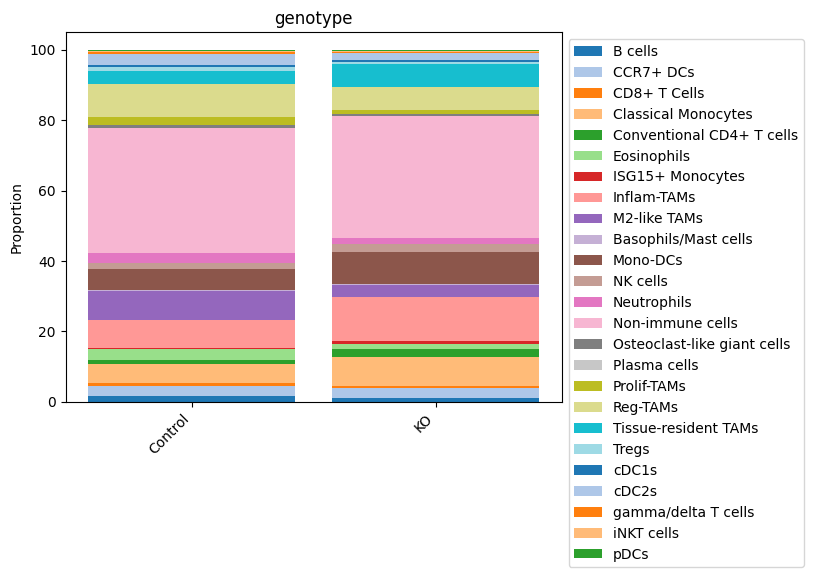

In [36]:
sccoda.plot_stacked_barplot(sccoda_data, modality_key="coda", feature_name="sample_id")
plt.show()

sccoda.plot_stacked_barplot(sccoda_data, modality_key="coda", feature_name="genotype")
plt.show()

<Axes: xlabel='Presence', ylabel='Total dispersion'>

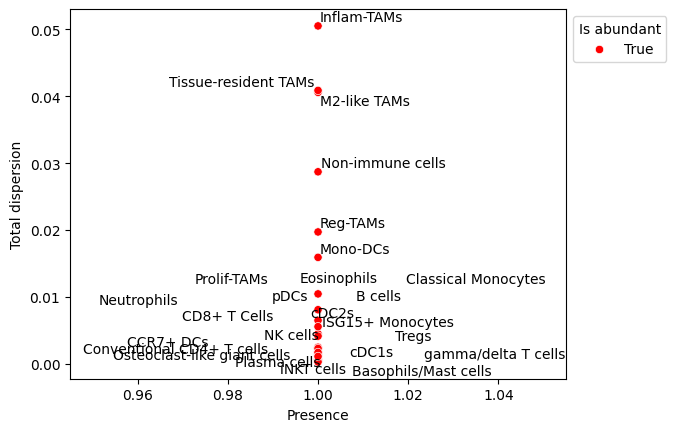

In [37]:
sccoda.plot_rel_abundance_dispersion_plot(sccoda_data, modality_key="coda", abundant_threshold=0.9)


# milo

In [1]:
import scanpy as sc
import pertpy as pt
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/pertpy-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read_h5ad("/home/icb/raphael.kfuri-rubens/data/yumm_analysis/anndata_files/immunity_dc_revision_annotation_v6.h5ad")

In [3]:
milo = pt.tl.Milo()
mdata = milo.load(adata)

In [4]:
mdata

MuData object with n_obs × n_vars = 33673 × 23676
  2 modalities
    rna:	33673 x 23676
      obs:	'library_id', 'sample_id', 'genotype', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_counts', 'log1p_n_counts', 'log1p_n_genes', 'percent_hb', 'n_counts_hb', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_top50', 'cell_passed_qc', 'consensus_fraction', 'qc_cluster', 'cluster_passed_qc', 'consensus_passed_qc', 'cell_passed_qc_int', 'cluster_passed_qc_int', 'consensus_passed_qc_int', 'leiden_res_0.05', 'leiden_res_0.10', 'leiden_res_0.50', 'leiden_res_1.00', 'leiden_res_2.00', 'annotation_v1_subannot', 'annotation_DC_fine', 'myeloid_fine', 'DC_fine', 'annotation_T_NK_fine', 'annotation_v2', 'annotation_MacMono_fine', 'annotation_v3', 'annotation_v4', 'annotation_b_sep', 'annotation_v5', 'annotation_v6'
      var:	'ensembl_ids', 'gene_symbols', 'n_cells', 'hb', 'mito', 'ribo', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'DC_fine_colors', 'annotation_DC_fine_colors', 'annotation_MacMono_fine_colors', 'annotation_T_NK_fine_colors', 'annotation_b_sep_colors', 'annotation_v1_subannot_colors', 'annotation_v2_colors', 'annotation_v3_colors', 'annotation_v4_colors', 'annotation_v5_colors', 'annotation_v6_colors', 'genotype_colors', 'hvg', 'leiden_res_0.05', 'leiden_res_0.10', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_1.00', 'leiden_res_2.00', 'library_id_colors', 'log1p', 'myeloid_fine_colors', 'neighbors', 'pca', 'predicted_doublet_colors', 'qc_cluster_colors', 'rank_genes_groups', 'sample_id_colors', 'scautoqc_ranges', 'scrublet', 'umap'
      obsm:	'X_pca', 'X_umap', 'X_umap_qc'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    milo:	0 x 0

In [5]:
sc.pp.neighbors(mdata["rna"], use_rep="X_pca", n_neighbors=150)

In [6]:
milo.make_nhoods(mdata["rna"], prop=0.1)

In [7]:
mdata = milo.count_nhoods(mdata, sample_col="sample_id")

In [8]:
mdata

MuData object with n_obs × n_vars = 33673 × 23676
  2 modalities
    rna:	33673 x 23676
      obs:	'library_id', 'sample_id', 'genotype', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_counts', 'log1p_n_counts', 'log1p_n_genes', 'percent_hb', 'n_counts_hb', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_top50', 'cell_passed_qc', 'consensus_fraction', 'qc_cluster', 'cluster_passed_qc', 'consensus_passed_qc', 'cell_passed_qc_int', 'cluster_passed_qc_int', 'consensus_passed_qc_int', 'leiden_res_0.05', 'leiden_res_0.10', 'leiden_res_0.50', 'leiden_res_1.00', 'leiden_res_2.00', 'annotation_v1_subannot', 'annotation_DC_fine', 'myeloid_fine', 'DC_fine', 'annotation_T_NK_fine', 'annotation_v2', 'annotation_MacMono_fine', 'annotation_v3', 'annotation_v4', 'annotation_b_sep', 'annotation_v5', 'annotation_v6', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
      var:	'ensembl_ids', 'gene_symbols', 'n_cells', 'hb', 'mito', 'ribo', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'DC_fine_colors', 'annotation_DC_fine_colors', 'annotation_MacMono_fine_colors', 'annotation_T_NK_fine_colors', 'annotation_b_sep_colors', 'annotation_v1_subannot_colors', 'annotation_v2_colors', 'annotation_v3_colors', 'annotation_v4_colors', 'annotation_v5_colors', 'annotation_v6_colors', 'genotype_colors', 'hvg', 'leiden_res_0.05', 'leiden_res_0.10', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_1.00', 'leiden_res_2.00', 'library_id_colors', 'log1p', 'myeloid_fine_colors', 'neighbors', 'pca', 'predicted_doublet_colors', 'qc_cluster_colors', 'rank_genes_groups', 'sample_id_colors', 'scautoqc_ranges', 'scrublet', 'umap', 'nhood_neighbors_key'
      obsm:	'X_pca', 'X_umap', 'X_umap_qc', 'nhoods'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    milo:	8 x 1426
      var:	'index_cell', 'kth_distance'
      uns:	'sample_col'

In [9]:
adata.obs["genotype"].value_counts()

genotype
Control    18122
KO         15551
Name: count, dtype: int64

In [16]:
mdata["milo"].uns["sample_col"]

'sample_id'

In [17]:
# Reorder categories
# (by default, the last category is taken as the condition of interest)
mdata["rna"].obs["genotype"] = mdata["rna"].obs["genotype"].cat.reorder_categories(["Control", "KO"])
milo.da_nhoods(mdata, design="~genotype", model_contrasts="genotypeKO", solver="pydeseq2")


Fitting size factors...
... done in 0.00 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 0.54 seconds.

Fitting dispersion trend curve...
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/pertpy-env/lib/python3.11/site-packages/pydeseq2/dds.py:805: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.52 seconds.

Fitting LFCs...
... done in 0.51 seconds.

Calculating cook's distance...
... done in 0.00 seconds.

Replacing 0 outlier genes.

Running Wald tests...


Log2 fold change & Wald test p-value: genotype KO vs Control
       baseMean  log2FoldChange     lfcSE      stat        pvalue      padj
0     51.918732       -1.008409  0.721229 -1.398181  1.620586e-01  0.430673
1     48.079653       -0.879211  0.578781 -1.519074  1.287438e-01  0.386564
2     28.417902       -0.139703  0.643481 -0.217105  8.281265e-01       NaN
3     39.379446       -0.972899  0.782341 -1.243574  2.136564e-01  0.500630
4     89.526825       -0.820543  0.948214 -0.865357  3.868429e-01  0.666931
...         ...             ...       ...       ...           ...       ...
1421  94.221405        0.723551  0.677051  1.068681  2.852136e-01  0.571411
1422  64.284977        4.018787  0.776162  5.177767  2.245572e-07  0.000196
1423  30.914244       -0.532350  0.608075 -0.875467  3.813197e-01       NaN
1424  99.643673        0.960941  0.712208  1.349241  1.772596e-01  0.455698
1425  31.045557        1.496937  0.751663  1.991499  4.642607e-02       NaN

[1426 rows x 6 columns]


... done in 0.62 seconds.



In [18]:
mdata["milo"].var


,index_cell,kth_distance,SpatialFDR,logCPM,logFC,PValue,FDR
0,AAAGCATGTTGCTTGG-1,3.699484,0.429669,51.918732,-1.008409,1.620586e-01,0.430673
1,AAAGGTTGTTATAGGG-1,5.185484,0.383122,48.079653,-0.879211,1.287438e-01,0.386564
2,AACATCCGTCTCACCT-1,5.671723,0.919111,28.417902,-0.139703,8.281265e-01,NaN
3,AACGCAAGTTTAGCGT-1,5.760159,0.499811,39.379446,-0.972899,2.136564e-01,0.500630
4,AACTGAGGTTCGGTGC-1,4.246737,0.674776,89.526825,-0.820543,3.868429e-01,0.666931
...,...,...,...,...,...,...,...
1421,TGAGCGCCACAAGGCC-1,4.408370,0.579006,94.221405,0.723551,2.852136e-01,0.571411
1422,TGATAGCCAAGTGGCC-1,4.607924,0.000227,64.284977,4.018787,2.245572e-07,0.000196
1423,TGCCATCCACATAGCG-1,6.602279,0.671210,30.914244,-0.532350,3.813197e-01,NaN
1424,TGGCTGACAATCTGCC-1,4.342408,0.451456,99.643673,0.960941,1.772596e-01,0.455698


In [19]:
milo.build_nhood_graph(mdata)

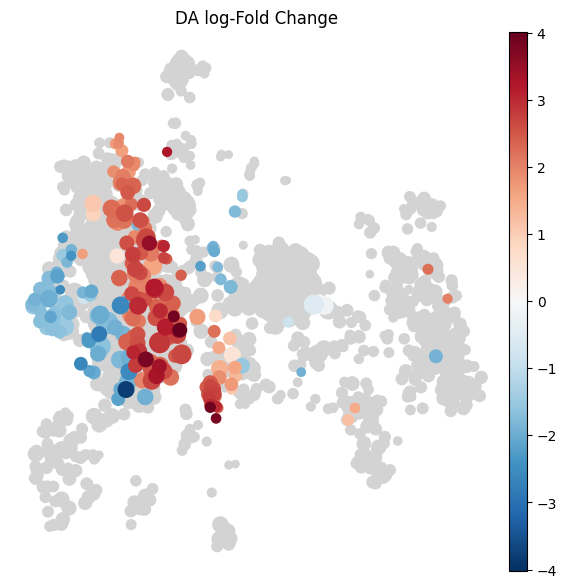

In [22]:
plt.rcParams["figure.figsize"] = [7, 7]
milo.plot_nhood_graph(
    mdata,
    alpha=0.1,  # SpatialFDR level (1%)
    min_size=1,  # Size of smallest dot
)

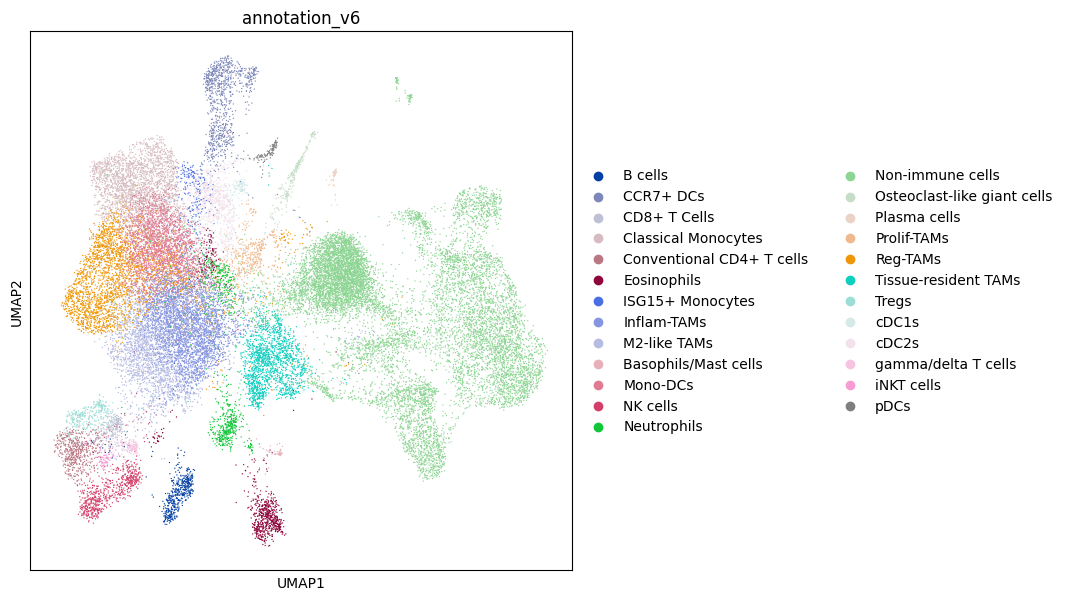

In [32]:
sc.pl.umap(adata, color="annotation_v6")

In [24]:
milo.annotate_nhoods(mdata, anno_col="annotation_v6")

In [25]:
mdata["milo"].var["nhood_annotation"] = mdata["milo"].var["nhood_annotation"].cat.add_categories("Mixed")
mdata["milo"].var.loc[mdata["milo"].var["nhood_annotation_frac"] < 0.6, "nhood_annotation"] = "Mixed"

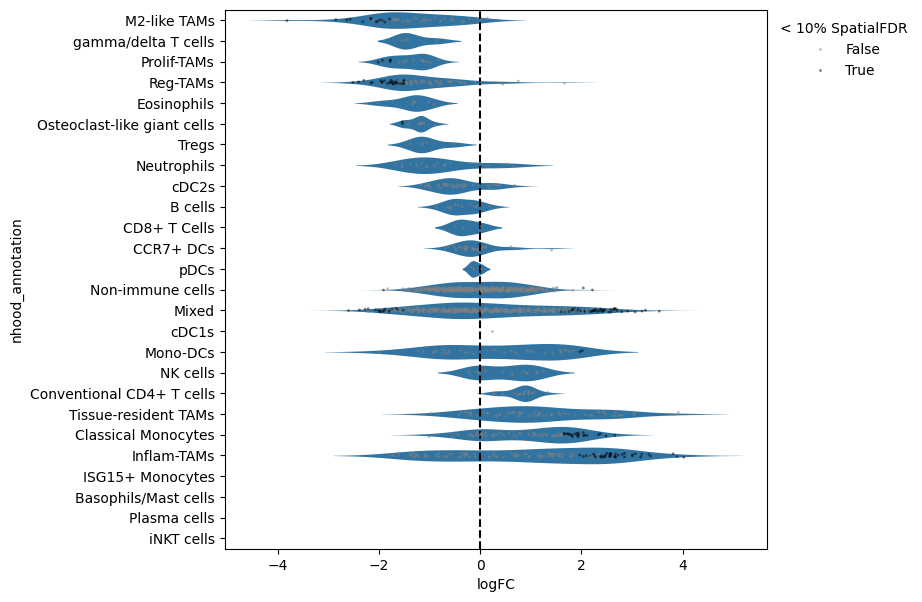

In [26]:
milo.plot_da_beeswarm(mdata, alpha=0.1)

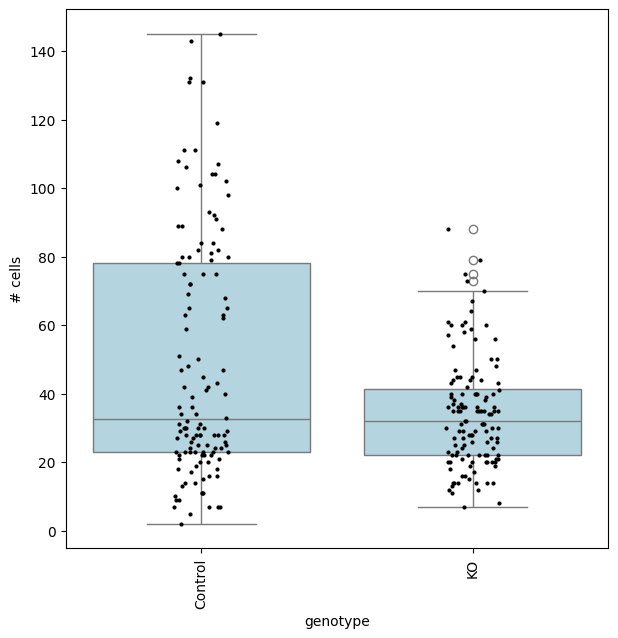

In [31]:
## Get IDs of plasmablast neighbourhood
#pl_nhoods = mdata["milo"].var_names[
#    (mdata["milo"].var["SpatialFDR"] < 0.1) & (mdata["milo"].var["nhood_annotation"] == "CCR7+ DCs")
#]

pl_nhoods = mdata["milo"].var_names[
    (mdata["milo"].var["nhood_annotation"] == "CCR7+ DCs")
]


## Visualize cell counts by condition (x-axis) and individuals on all neighbourhoods
milo.plot_nhood_counts_by_cond(mdata, test_var="genotype", subset_nhoods=pl_nhoods, log_counts=False)

In [22]:
df = pd.crosstab(adata.obs["annotation_v6"], adata.obs["sample_id"])
df

sample_id,S2,S4,S5,S7,S8,S9,S10,S13
annotation_v6,,,,,,,,
B cells,90,115,53,48,60,76,21,23
CCR7+ DCs,54,67,223,171,100,85,80,166
CD8+ T Cells,13,8,99,25,32,16,10,17
Classical Monocytes,223,234,251,264,246,275,340,451
Conventional CD4+ T cells,43,56,67,45,132,70,54,73
Eosinophils,50,31,366,101,91,57,63,12
ISG15+ Monocytes,5,28,17,20,36,25,49,34
Inflam-TAMs,642,640,84,63,672,642,572,59
M2-like TAMs,100,90,781,555,84,76,83,289


# generate heatmap according to hierarchical clustering and those methods 